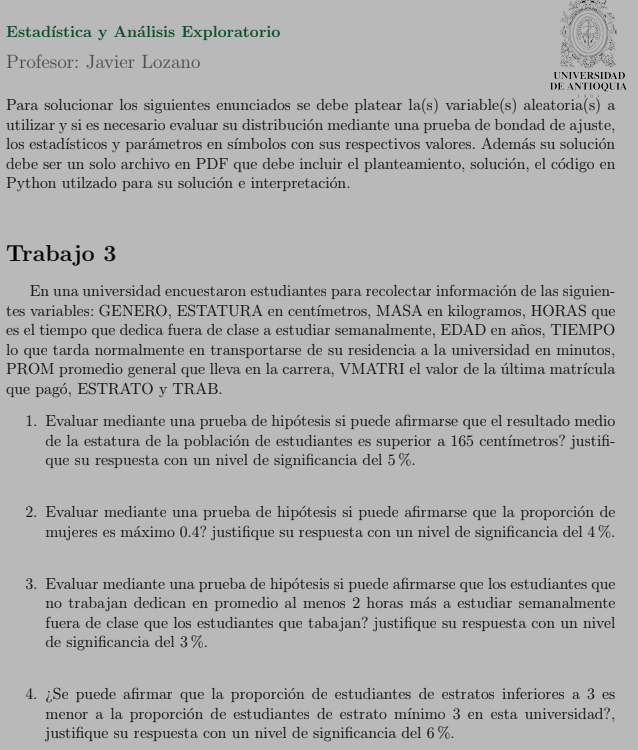

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import f, t, norm, chi2, shapiro, chisquare, kstest
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest


data = pd.read_excel('BaseTaller3EAE20252.xlsx')

data.head()

,GENERO,ESTATURA,MASA,HORAS,EDAD,TIEMPO,PROM,VMATRI,ESTRATO,TRAB
0,MUJER,155.6,64.0,38,20.8,21.8,4.1,1734.0,4,NO
1,MUJER,153.6,67.4,36,19.0,31.2,3.9,835.8,3,SI
2,MUJER,168.4,62.3,40,20.6,51.7,3.5,127.5,1,NO
3,MUJER,180.9,84.2,42,19.3,34.1,4.2,1659.0,4,NO
4,HOMBRE,165.3,64.1,28,27.8,7.2,3.2,915.6,3,NO


Punto 1

In [2]:
# Ho: u <= 165 Ha : u > 165
x_bar = data['ESTATURA'].mean()
s = data['ESTATURA'].std()
n = data['ESTATURA'].shape[0]
u0 = 165
alfa = 0.05

stat, p = shapiro(data['ESTATURA'])

print(f'Estadístico de Shapiro-Wilk: {stat}')
print(f'Valor-p: {p}')

# Interpretación
if p > 0.05:
    print("No se rechaza H0: La columna parece provenir de una distribución normal.")
else:
    print("Se rechaza H0: La columna NO parece provenir de una distribución normal.")

t_critico = t.ppf(1 - alfa, n - 1)
t_calculado = (x_bar - u0) / (s / np.sqrt(n))

print(f'T crítico: {t_critico}')
print(f'T calculado: {t_calculado}')
if t_calculado > t_critico:
    print("Se rechaza H0: La estatura promedio es mayor a 165 cm.")
else:
    print("No se rechaza H0: No hay evidencia suficiente para afirmar que la estatura promedio es mayor a 165 cm.")

p_valor = t.sf(t_calculado, n - 1)
print(f'Valor-p: {p_valor}')

if p_valor <= alfa:
    print("Se rechaza H0: La estatura promedio es mayor a 165 cm.")
else:
    print("No se rechaza H0: No hay evidencia suficiente para afirmar que la estatura promedio es mayor a 165 cm.")

Estadístico de Shapiro-Wilk: 0.9889646533473238
Valor-p: 0.6548633321502867
No se rechaza H0: La columna parece provenir de una distribución normal.
T crítico: 1.662155325834565
T calculado: 3.0046831801800993
Se rechaza H0: La estatura promedio es mayor a 165 cm.
Valor-p: 0.0017264538466832634
Se rechaza H0: La estatura promedio es mayor a 165 cm.


Punto 2

In [3]:
# Ho: p <= 0.4 Ha: p > 0.4

alfa2 = 4/100
x = (data['GENERO'] == "MUJER").sum()
n2 = data['GENERO'].shape[0]
p = x / n2
p0 = 0.4

z_calculado = (p - p0) / np.sqrt((p0 * (1 - p0)) / n2)
z_critico = norm.ppf(1 - alfa2)

print(f'Z crítico: {z_critico}')
print(f'Z calculado: {z_calculado}')
if z_calculado > z_critico:
    print("Se rechaza H0: La proporción de mujeres es mayor a 0.4.")
else:
    print("No se rechaza H0: No hay evidencia suficiente para afirmar que la proporción de mujeres es mayor a 0.4.")

p_valor2 = norm.sf(z_calculado)
print(f'Valor-p: {p_valor2}')

if p_valor2 <= alfa2:
    print("Se rechaza H0: La proporción de mujeres es mayor a 0.4.")
else:
    print("No se rechaza H0: No hay evidencia suficiente para afirmar que la proporción de mujeres es mayor a 0.4.")


Z crítico: 1.7506860712521692
Z calculado: 0.43033148291193474
No se rechaza H0: No hay evidencia suficiente para afirmar que la proporción de mujeres es mayor a 0.4.
Valor-p: 0.3334772643464099
No se rechaza H0: No hay evidencia suficiente para afirmar que la proporción de mujeres es mayor a 0.4.


Punto 3

In [4]:
data.head()

,GENERO,ESTATURA,MASA,HORAS,EDAD,TIEMPO,PROM,VMATRI,ESTRATO,TRAB
0,MUJER,155.6,64.0,38,20.8,21.8,4.1,1734.0,4,NO
1,MUJER,153.6,67.4,36,19.0,31.2,3.9,835.8,3,SI
2,MUJER,168.4,62.3,40,20.6,51.7,3.5,127.5,1,NO
3,MUJER,180.9,84.2,42,19.3,34.1,4.2,1659.0,4,NO
4,HOMBRE,165.3,64.1,28,27.8,7.2,3.2,915.6,3,NO


In [6]:
# Ho: u1 - u2 >= 2 Ha: u1 - u2 < 2

est_no_trab = data[data["TRAB"] == 'NO']
est_trab = data[data["TRAB"] == 'SI']

x1 = est_no_trab['HORAS'].mean()
s1 = est_no_trab['HORAS'].std()
n1 = est_no_trab['HORAS'].shape[0]
x2 = est_trab['HORAS'].mean()
s2 = est_trab['HORAS'].std()
n2 = est_trab['HORAS'].shape[0]
delta = 2
alfa3 = 0.03

stat1, p1 = shapiro(est_trab['HORAS'])

print(f'Estadístico de Shapiro-Wilk: {stat1}')
print(f'Valor-p: {p1}')

# Interpretación
if p1 > 0.05:
    print("No se rechaza H0: La columna parece provenir de una distribución normal.")
else:
    print("Se rechaza H0: La columna NO parece provenir de una distribución normal.")

stat2, p2 = shapiro(est_no_trab['HORAS'])

print(f'Estadístico de Shapiro-Wilk: {stat2}')
print(f'Valor-p: {p2}')

# Interpretación
if p2 > 0.05:
    print("No se rechaza H0: La columna parece provenir de una distribución normal.")
else:
    print("Se rechaza H0: La columna NO parece provenir de una distribución normal.")


z_calculado, p_valor = ztest(est_no_trab['HORAS'], est_trab['HORAS'], alternative='smaller')
z_critico = norm.ppf(alfa3)

print(f'Z crítico: {z_critico}')
print(f'Z calculado: {z_calculado}')
if z_calculado < z_critico:
    print("Se rechaza H0: La diferencia en horas es menor a 2.")    
else:
    print("No se rechaza H0: No hay evidencia suficiente para afirmar que la diferencia en horas es menor a 2.")

p_valor = norm.cdf(z_calculado)
print(f'Valor-p: {p_valor}')
if p_valor <= alfa3:
    print("Se rechaza H0: La diferencia en horas es menor a 2.")    
else:
    print("No se rechaza H0: No hay evidencia suficiente para afirmar que la diferencia en horas es menor a 2.")

Estadístico de Shapiro-Wilk: 0.9190243367297621
Valor-p: 0.02224189985051193
Se rechaza H0: La columna NO parece provenir de una distribución normal.
Estadístico de Shapiro-Wilk: 0.9271517676400447
Valor-p: 0.0016703938886252364
Se rechaza H0: La columna NO parece provenir de una distribución normal.
Z crítico: -1.880793608151251
Z calculado: 1.6560157303268774
No se rechaza H0: No hay evidencia suficiente para afirmar que la diferencia en horas es menor a 2.
Valor-p: 0.9511406833535212
No se rechaza H0: No hay evidencia suficiente para afirmar que la diferencia en horas es menor a 2.


Punto 4

In [18]:
# P1:est inferiores a 3 P2: est superiores o iguales a 3
# Ho: p1 - p2 >= 0 Ha: p1 - p2 < 0

alpha = 0.06
estu_estratos_menores_3 = data[data['ESTRATO'] < 3]
estu_estratos_3_o_mayores = data[data['ESTRATO'] >= 3]
n = data.shape[0]
p1 = estu_estratos_menores_3.shape[0] / n
p2 = estu_estratos_3_o_mayores.shape[0] / n
p_diff = p1 - p2

# Prueba de dos proporciones
z_stat, p_value = proportions_ztest(count = estu_estratos_menores_3, nobs=n, alternative="smaller")  
# "smaller" porque Ha: p1 < p2

print("Estadístico Z:", z_stat)
print("p-value:", p_value)

zcritt = norm.ppf(alpha)
print("Z crítico:", zcritt)

# Decisión
alpha = 0.06
if p_value < alpha:
    print("Rechazo H0: la proporción de estrato < 3 es menor a la de estrato ≥ 3")
else:
    print("No rechazo H0: no hay evidencia suficiente")


TypeError: can't multiply sequence by non-int of type 'float'